# Decision Trees

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

//anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#import imputed dataset
mice_rf = pd.read_csv("data/imputed_dataset_no_censoring_01042018_MICERF")
mice_std = pd.read_csv("data/imputed_dataset_no_censoring_01042018_MICERF_standardized")

In [3]:
#target variable should not be standardized
#replace life expectancy column in mice_std with a non standardized life expectancy variable
df = mice_std.copy()
df.drop("life_expectancy", axis=1, inplace=True)
df['life_expectancy'] = mice_rf["life_expectancy"]

In [5]:
df

,Gender,Tumor_type,Tumor_grade,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,...,Tumor_Location,Tumor_Position,Surgery_type,Age_surgery,IDH,TERT,IDH_TERT,X1p19q_codel,IK,life_expectancy
0,M,gliome,three,NC,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,A,G,partielle,0.414634,mutant,wt,three,zero,0.750,30
1,M,astrocytome,two,NC,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,N,non précisé,exérèse,0.243902,NC,mutant,four,zero,0.875,2069
2,F,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,A,G,aucune,0.621951,wt,mutant,four,zero,0.625,393
3,M,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,A,D,partielle,0.646341,wt,wt,three,zero,0.500,398
4,F,GBM,four,NORMAL,METHYLE,AMPLIFIE,NORMAL,NORMAL,NORMAL,Maintien,...,A,D,exérèse,0.609756,wt,mutant,four,zero,0.625,433
5,M,GBM,four,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,Maintien,...,A,G,exérèse,0.585366,wt,mutant,four,zero,0.750,143
6,M,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,N,G,exérèse,0.743902,wt,wt,three,zero,0.750,408
7,M,GBM,four,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,N,non précisé,exérèse,0.707317,wt,mutant,four,zero,0.500,7
8,F,astrocytome,three,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,A,G,partielle,0.646341,wt,mutant,four,zero,0.750,316
9,M,GBM,four,NORMAL,METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,Maintien,...,A,G,partielle,0.426829,wt,mutant,four,zero,0.750,571


In [4]:
df = df[df['Tumor_type'] == "GBM"]

In [6]:
#specify categorical variables coded as numbers as such, to avoid pandas reading them as continuous ones
df.columns

Index(['Gender', 'Tumor_type', 'Tumor_grade', 'Gene_P53', 'Gene_Mgmt',
       'Gene_Egfr', 'Gene_Mdm2', 'Gene_Cdk4', 'Gene_P16', 'Gene_Ihc_Atrx',
       'Gene_Ch10Q', 'Gene_Ch9P', 'Tumor_Location', 'Tumor_Position',
       'Surgery_type', 'Age_surgery', 'IDH', 'TERT', 'IDH_TERT',
       'X1p19q_codel', 'IK', 'life_expectancy'],
      dtype='object')

In [7]:
#create dataset with dummy variables
#specify all categorical variables as otherwise .get_dummies() will still ignore IDH_TERT/Tumor_grade etc.
df_dum = pd.get_dummies(df)

In [8]:
#check
df_dum.columns

Index(['Age_surgery', 'IK', 'life_expectancy', 'Gender_F', 'Gender_M',
       'Tumor_type_GBM', 'Tumor_grade_four', 'Gene_P53_ALTERE', 'Gene_P53_NC',
       'Gene_P53_NORMAL', 'Gene_Mgmt_METHYLE', 'Gene_Mgmt_NON METHYLE',
       'Gene_Egfr_AMPLIFIE', 'Gene_Egfr_NORMAL', 'Gene_Mdm2_AMPLIFIE',
       'Gene_Mdm2_NORMAL', 'Gene_Cdk4_AMPLIFIE', 'Gene_Cdk4_NORMAL',
       'Gene_P16_DELETE', 'Gene_P16_NORMAL',
       'Gene_Ihc_Atrx_Extinction diffuse', 'Gene_Ihc_Atrx_Maintien',
       'Gene_Ihc_Atrx_extinction', 'Gene_Ch10Q_NON PERTE', 'Gene_Ch10Q_PERTE',
       'Gene_Ch9P_GAIN', 'Gene_Ch9P_NON PERTE', 'Gene_Ch9P_PERTE',
       'Tumor_Location_A', 'Tumor_Location_B', 'Tumor_Location_C',
       'Tumor_Location_N', 'Tumor_Location_autre', 'Tumor_Position_D',
       'Tumor_Position_G', 'Tumor_Position_bilatéral', 'Tumor_Position_médian',
       'Tumor_Position_non précisé', 'Surgery_type_aucune',
       'Surgery_type_biopsie', 'Surgery_type_exérèse',
       'Surgery_type_partielle', 'IDH_NC', 'I

In [9]:
#separate target column from the predictors
predictors = df_dum.drop("life_expectancy", axis = 1)
target = df_dum['life_expectancy']

In [10]:
#now separate the test set from the training one
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size = 0.15, random_state = 37)

In [11]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1020, 51), (181, 51), (1020,), (181,))

In [12]:
#now separate the training set into training and validation
#training_set = pd.concat([X_train, Y_train], axis = 1)

In [13]:
#training_set.shape

In [14]:
#r, c = training_set.shape

In [15]:
#i_cols = []
#for i in range(0, c-1):
#    i_cols.append(i)

In [16]:
#separate target column and rest
#X = training_set.iloc[:,0:(c-1)]
#Y = training_set.iloc[:,(c-1)]

In [17]:
#X.shape, Y.shape

In [18]:
#validation set size
#val_size = 0.1

In [19]:
#use a common seed
seed = 0

In [20]:
#Split the data
#X_train_2, X_val, Y_train2, Y_val = cross_validation.train_test_split(X, Y, 
 #                                                                    test_size = val_size, 
  #                                                                    random_state = seed)

In [21]:
#All features
X_all = []

#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms
mae = []

# Linear regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression(n_jobs = -1)
algo = "LR"

In [24]:
for name, i_cols_list in X_all:
    model.fit(X_train_2.iloc[:, i_cols_list], Y_train2)
    result = mean_absolute_error(Y_val, model.predict(X_val.iloc[:, i_cols_list]))
    mae.append(result)
    print(name + " %s" % result)
comb.append(algo)

In [25]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [26]:
pred = model.predict(X_test)

In [27]:
result = mean_absolute_error(Y_test, pred)
print(result)

286351523208.99445


In [28]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-5.69640089e+02  2.80032697e+02 -5.10528279e+15 -5.10528279e+15
 -9.40700424e+15  1.20029793e+16  6.98459172e+15  6.98459172e+15
  6.98459172e+15 -2.03080411e+16 -2.03080411e+16  1.79210667e+16
  1.79210667e+16  8.46518012e+15  8.46518012e+15  1.64756340e+16
  1.64756340e+16 -5.72132009e+15 -5.72132009e+15  6.41612003e+14
  6.41612003e+14  6.41612003e+14  6.90903314e+15  6.90903314e+15
  4.74735717e+15  4.74735717e+15  4.74735717e+15  1.57224425e+14
  1.57224425e+14  1.57224425e+14  1.57224425e+14  2.09054050e+14
  3.55166615e+15  3.55166615e+15  3.55166615e+15  3.55166615e+15
  3.55166615e+15  1.01090074e+15  1.01090074e+15  1.01090074e+15
  1.01090074e+15  3.96574774e+15  3.96574774e+15  3.96574774e+15
  9.57510280e+15  9.57510280e+15 -1.37448340e+15 -1.37448340e+15
 -1.37448340e+15  4.21054711e+15  4.21054711e+15]


In [29]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, pred))

Mean squared error: 14841492236113607173079040.00


In [30]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, pred))

Variance score: -83330688018136662016.00


In [31]:
mae, comb

([], ['LR'])

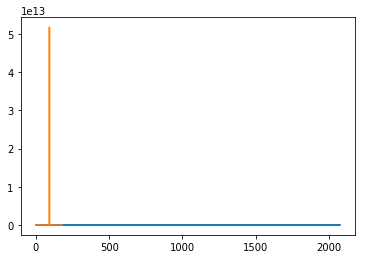

In [32]:
plt.plot(Y_test)
plt.plot(pred)

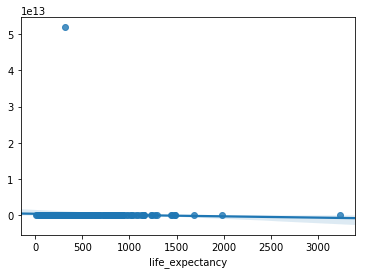

In [33]:
sns.regplot(Y_test, pred)

# Ridge LinearRegression 

In [34]:
from sklearn.linear_model import Ridge

In [35]:
#alpha values
a_list = np.array([1, 10, 100, 150, 500])

In [36]:
for alpha in a_list:
    #set base model
    model = Ridge(alpha = alpha, random_state = seed)
    
    algo = "Ridge"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
    
    comb.append(algo + " %s" % alpha)

291.3992017746283
291.1422435797122
293.9351867335646
295.4185982774164
303.03674801665306


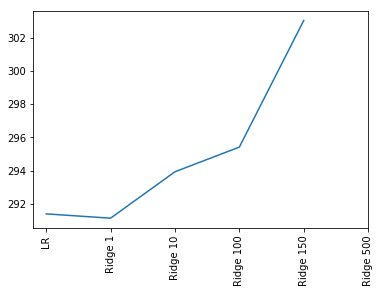

In [37]:
#Plot mae and all combinations
fix, ax = plt.subplots()
plt.plot(mae)

#Set tick names to names of all combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb, rotation = "vertical")
plt.show()

# Lasso Linear Regression

In [38]:
from sklearn.linear_model import Lasso

In [39]:
#alpha value
a_list = np.array([1, 10, 100, 150, 500, 1000])

In [40]:
for alpha in a_list:
    
    #set base model
    
    model = Lasso(alpha = alpha, random_state = seed)
    
    algo = "Lasso"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
    comb.append(algo + " %s" % alpha)

289.7885874010102
301.72656516564393
315.65134329975086
315.65134329975086
315.65134329975086
315.65134329975086


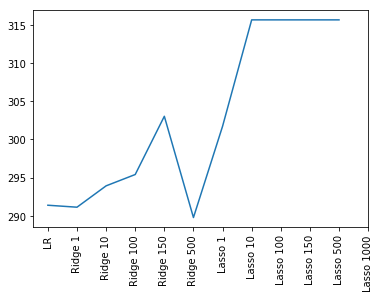

In [41]:
#Plot the MAE and all combinations
fig, ax = plt.subplots()
plt.plot(mae)

#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb, rotation = "vertical")

#plot
plt.show()

# Elastic net regression

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
a_list = np.array([0.1, 1, 10, 100, 1000])

In [44]:
for alpha in a_list:
    
    model = ElasticNet(alpha = alpha, random_state=seed)
    
    algo = "Elastic"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
    
    comb.append(algo + " %s" % alpha)

292.0853262919257
303.4773686428781
313.9643287251346
315.6486455168208
315.65134329975086


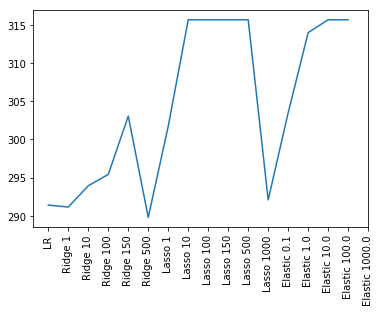

In [45]:
fix, ax = plt.subplots()

plt.plot(mae)

ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb, rotation = "vertical")

plt.show()

# KNN

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
n_list = np.array([1, 5, 10, 20, 30, 50, 100])

In [48]:
for neighbors in n_list:
    
    model = KNeighborsRegressor(n_neighbors = neighbors, n_jobs = -1)
    
    algo = "KNN"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
    comb.append(algo + " %s" % result)

353.65193370165747
311.82983425414363
296.05690607734806
299.2801104972376
297.97900552486186
291.0166850828729
296.63961325966847


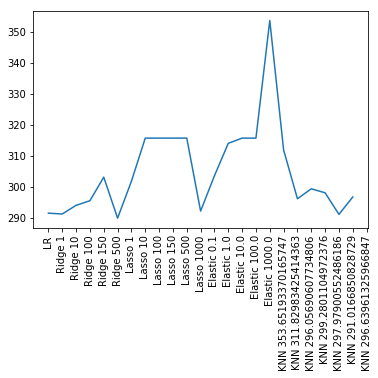

In [49]:
##Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
##Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
##Plot the accuracy for all combinations
plt.show()    

# CART

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
model = DecisionTreeRegressor(random_state = seed)
    
algo = "CART"
    
model.fit(X_train, Y_train)
result = mean_absolute_error(Y_test, model.predict(X_test))
        
mae.append(result)

print(result)

434.73756906077347


In [52]:
#Add max depth value
d_list = np.array([20])

In [53]:
for max_depth in d_list:
    
    model = DecisionTreeRegressor(max_depth = max_depth, random_state = seed)
    
    algo = "CART"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
        
    mae.append(result)
        
    print(result)
    
    comb.append(algo + " %s" % max_depth)

437.0550184162062


# SVM

In [54]:
from sklearn.svm import SVR

In [55]:
#C value
c_list = np.array([5])

In [56]:
for C in c_list:
    
    model = SVR(C=C)
    
    algo = "SVM"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
    comb.append(algo + " %s" % result)

301.2516683884943


In [57]:
mae

[291.3992017746283,
 291.1422435797122,
 293.9351867335646,
 295.4185982774164,
 303.03674801665306,
 289.7885874010102,
 301.72656516564393,
 315.65134329975086,
 315.65134329975086,
 315.65134329975086,
 315.65134329975086,
 292.0853262919257,
 303.4773686428781,
 313.9643287251346,
 315.6486455168208,
 315.65134329975086,
 353.65193370165747,
 311.82983425414363,
 296.05690607734806,
 299.2801104972376,
 297.97900552486186,
 291.0166850828729,
 296.63961325966847,
 434.73756906077347,
 437.0550184162062,
 301.2516683884943]

# Bagged Decision Trees

In [58]:
#before starting trees, we reinitialize datasets since we don't need dummies for these methods
df_trees = df.copy()

In [59]:
df_trees

,Gender,Tumor_type,Tumor_grade,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,Gene_Ihc_Atrx,...,Tumor_Location,Tumor_Position,Surgery_type,Age_surgery,IDH,TERT,IDH_TERT,X1p19q_codel,IK,life_expectancy
2,F,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,A,G,aucune,0.621951,wt,mutant,four,zero,0.625,393
3,M,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,A,D,partielle,0.646341,wt,wt,three,zero,0.500,398
4,F,GBM,four,NORMAL,METHYLE,AMPLIFIE,NORMAL,NORMAL,NORMAL,Maintien,...,A,D,exérèse,0.609756,wt,mutant,four,zero,0.625,433
5,M,GBM,four,ALTERE,NON METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,Maintien,...,A,G,exérèse,0.585366,wt,mutant,four,zero,0.750,143
6,M,GBM,four,NORMAL,NON METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,N,G,exérèse,0.743902,wt,wt,three,zero,0.750,408
7,M,GBM,four,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,N,non précisé,exérèse,0.707317,wt,mutant,four,zero,0.500,7
9,M,GBM,four,NORMAL,METHYLE,AMPLIFIE,NORMAL,NORMAL,DELETE,Maintien,...,A,G,partielle,0.426829,wt,mutant,four,zero,0.750,571
16,F,GBM,four,NORMAL,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,N,G,exérèse,0.500000,wt,mutant,four,zero,0.250,666
17,F,GBM,four,NORMAL,METHYLE,NORMAL,NORMAL,NORMAL,DELETE,Maintien,...,N,D,exérèse,0.780488,wt,mutant,four,zero,0.375,355
19,M,GBM,four,NC,METHYLE,NORMAL,NORMAL,NORMAL,NORMAL,Maintien,...,A,non précisé,partielle,0.451220,wt,wt,three,zero,1.000,96


In [60]:
#separate target column from the predictors
predictors = df_dum.drop("life_expectancy", axis = 1)
target = df_dum['life_expectancy']

In [61]:
#now separate the test set from the training one
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size = 0.15, random_state = 37)

In [62]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1020, 51), (181, 51), (1020,), (181,))

In [63]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [64]:
#n_estimators
n_list = np.array([10])

In [65]:
for n_estimators in n_list:
    
    model = BaggingRegressor(n_jobs = -1, n_estimators = n_estimators, random_state = seed)
    
    algo = "Bag"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

337.3539134438306


# Random forest (Bagging)

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
#n_estimators

n_list = np.array([])

In [68]:
for n_estimators in n_list:
    
    model = RandomForestRegressor(n_jobs = -1, n_estimators = n_estimators, 
                                 random_state = seed)
    
    algo = "RF"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

# Extra Trees

In [69]:
from sklearn.ensemble import ExtraTreesRegressor

In [70]:
n_list = np.array([50])

In [71]:
for n_estimators in n_list:
    
    model = ExtraTreesRegressor(n_jobs = -1, n_estimators = n_estimators, random_state = seed
                               )
    algo = "ET"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

326.0038674033149


# Ada Boosting

In [72]:
from sklearn.ensemble import AdaBoostRegressor

In [73]:
#n_estimators
n_list = np.array([30])

In [74]:
for n_estimators in n_list:
    
    model = AdaBoostRegressor(n_estimators = n_estimators, random_state = seed)

    algo = "Ada"

    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

333.69479480455755


# Stochastic Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
n_list = np.array([10])

In [77]:
for n_estimators in n_list:
    
    model = GradientBoostingRegressor(n_estimators = n_estimators, random_state = seed)
    
    algo = "SGB"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

299.48768265840704


# XGBoost

In [78]:
from xgboost import XGBRegressor

In [79]:
n_list = np.array([10])

for n_estimators in n_list:
    
    model = XGBRegressor(n_estimators = n_estimators, random_seed = seed)
    
    algo = "XGB"
    
    model.fit(X_train, Y_train)
    result = mean_absolute_error(Y_test, model.predict(X_test))
    mae.append(result)
    print(result)
        
comb.append(algo + " %s" % result)

289.3888430516364


In [80]:
dtrain = xgb.DMatrix(X_train, label = Y_train)
dtest = xgb.DMatrix(X_test, label = Y_test)

In [81]:
#Learn mean from training data
mean_train = np.mean(Y_train)

#Get predictions on the test set
baseline_predictions = np.ones(Y_test.shape) * mean_train

#Compute MAE
mae_baseline = mean_absolute_error(Y_test, baseline_predictions)

print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 315.65


In [82]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [83]:
params['eval_metric'] = "mae"

In [84]:
num_boost_round = 999

In [85]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:397.455
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:321.712
[2]	Test-mae:279.268
[3]	Test-mae:270.248
[4]	Test-mae:274.721
[5]	Test-mae:284.936
[6]	Test-mae:285.846
[7]	Test-mae:287.556
[8]	Test-mae:288.604
[9]	Test-mae:292.671
[10]	Test-mae:297.787
[11]	Test-mae:304.475
[12]	Test-mae:309.395
[13]	Test-mae:309.6
Stopping. Best iteration:
[3]	Test-mae:270.248



In [86]:
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAE: 270.25 with 4 rounds


In [87]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

cv_results

,test-mae-mean,test-mae-std,train-mae-mean,train-mae-std
0,395.497394,22.573793,389.061151,4.145575
1,327.124085,25.677055,304.349164,4.471526
2,295.860712,25.889210,258.910513,4.505818
3,283.140894,25.746599,234.933945,5.690349
4,279.816949,27.179934,220.517075,6.829544


In [88]:
cv_results['test-mae-mean'].min()

279.8169494

In [89]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(5,12)
    for min_child_weight in range(3,11)
]

In [90]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )

    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)

print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=5, min_child_weight=3


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


	MAE 282.22176479999996 for 4 rounds
CV with max_depth=5, min_child_weight=4
	MAE 278.6410034 for 4 rounds
CV with max_depth=5, min_child_weight=5
	MAE 277.2923828 for 4 rounds
CV with max_depth=5, min_child_weight=6
	MAE 275.9242402 for 4 rounds
CV with max_depth=5, min_child_weight=7
	MAE 278.1067322 for 5 rounds
CV with max_depth=5, min_child_weight=8
	MAE 274.3648164 for 4 rounds
CV with max_depth=5, min_child_weight=9
	MAE 276.50067440000004 for 4 rounds
CV with max_depth=5, min_child_weight=10
	MAE 274.03905019999996 for 4 rounds
CV with max_depth=6, min_child_weight=3
	MAE 286.39970999999997 for 3 rounds
CV with max_depth=6, min_child_weight=4
	MAE 283.9438904 for 4 rounds
CV with max_depth=6, min_child_weight=5
	MAE 282.9734436 for 4 rounds
CV with max_depth=6, min_child_weight=6
	MAE 280.390158 for 4 rounds
CV with max_depth=6, min_child_weight=7
	MAE 279.88400880000006 for 4 rounds
CV with max_depth=6, min_child_weight=8
	MAE 277.336685 for 4 rounds
CV with max_depth=6, min_c

In [91]:
#we get the best score with a max_depth of 5 and a min_child_weight of 6
params['max_depth'] = 10
params['min_child_weight'] = 6

In [92]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [93]:
min_mae = float("Inf")
best_params = None

# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))

    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )

    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)

print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


	MAE 291.7141542 for 4 rounds
CV with subsample=1.0, colsample=0.9
	MAE 288.3768218 for 4 rounds
CV with subsample=1.0, colsample=0.8
	MAE 287.00274060000004 for 4 rounds
CV with subsample=1.0, colsample=0.7
	MAE 285.5018584 for 4 rounds
CV with subsample=0.9, colsample=1.0
	MAE 292.03467440000003 for 3 rounds
CV with subsample=0.9, colsample=0.9
	MAE 290.67130119999996 for 4 rounds
CV with subsample=0.9, colsample=0.8
	MAE 288.64778140000004 for 4 rounds
CV with subsample=0.9, colsample=0.7
	MAE 286.1399688 for 4 rounds
CV with subsample=0.8, colsample=1.0
	MAE 289.394403 for 3 rounds
CV with subsample=0.8, colsample=0.9
	MAE 286.6519044 for 4 rounds
CV with subsample=0.8, colsample=0.8
	MAE 285.88761 for 4 rounds
CV with subsample=0.8, colsample=0.7
	MAE 285.5043764 for 4 rounds
CV with subsample=0.7, colsample=1.0
	MAE 283.3055602 for 4 rounds
CV with subsample=0.7, colsample=0.9
	MAE 283.58265040000003 for 4 rounds
CV with subsample=0.7, colsample=0.8
	MAE 286.7843628 for 4 rounds


In [94]:
params['subsample'] = .8
params['colsample_bytree'] = 1

In [95]:
min_mae = float("Inf")

best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    
    print("CV with eta={}".format(eta))

    # We update our parameters
    params['eta'] = eta

    # Run and time CV
    %time cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round, seed=42, nfold=5, metrics=['mae'], early_stopping_rounds=10)

    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
   
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta

print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
CPU times: user 338 ms, sys: 3.25 ms, total: 341 ms
Wall time: 340 ms
	MAE 289.394403 for 3 rounds

CV with eta=0.2


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


CPU times: user 447 ms, sys: 2.99 ms, total: 450 ms
Wall time: 449 ms
	MAE 285.3973482 for 8 rounds

CV with eta=0.1


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


CPU times: user 617 ms, sys: 3.6 ms, total: 620 ms
Wall time: 619 ms
	MAE 281.8647888 for 15 rounds

CV with eta=0.05


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


CPU times: user 1.01 s, sys: 6.64 ms, total: 1.02 s
Wall time: 1.02 s
	MAE 280.7027556 for 33 rounds

CV with eta=0.01


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


CPU times: user 4.23 s, sys: 24.6 ms, total: 4.25 s
Wall time: 4.25 s
	MAE 277.3789858 for 172 rounds

CV with eta=0.005


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


CPU times: user 8.13 s, sys: 48.5 ms, total: 8.18 s
Wall time: 8.19 s
	MAE 275.80035399999997 for 342 rounds

Best params: 0.005, MAE: 275.80035399999997


//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


In [96]:
params['eta'] = 0.01

In [97]:
#best params
params

{'colsample_bytree': 1,
 'eta': 0.01,
 'eval_metric': 'mae',
 'max_depth': 10,
 'min_child_weight': 6,
 'objective': 'reg:linear',
 'subsample': 0.8}

In [98]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round = num_boost_round,
    evals = [(dtest, "Test")],
    early_stopping_rounds = 10)

[0]	Test-mae:534.229
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:529.505
[2]	Test-mae:524.722
[3]	Test-mae:520.093
[4]	Test-mae:515.361
[5]	Test-mae:510.921
[6]	Test-mae:506.469
[7]	Test-mae:501.934
[8]	Test-mae:497.524
[9]	Test-mae:492.873
[10]	Test-mae:488.531
[11]	Test-mae:484.124
[12]	Test-mae:479.752
[13]	Test-mae:475.413
[14]	Test-mae:471.1
[15]	Test-mae:467.108
[16]	Test-mae:463
[17]	Test-mae:459.04
[18]	Test-mae:455.062
[19]	Test-mae:451.242
[20]	Test-mae:447.336
[21]	Test-mae:443.372
[22]	Test-mae:439.753
[23]	Test-mae:436.101
[24]	Test-mae:432.716
[25]	Test-mae:428.987
[26]	Test-mae:425.817
[27]	Test-mae:422.331
[28]	Test-mae:419.024
[29]	Test-mae:415.957
[30]	Test-mae:412.57
[31]	Test-mae:409.504
[32]	Test-mae:406.42
[33]	Test-mae:403.411
[34]	Test-mae:400.29
[35]	Test-mae:397.339
[36]	Test-mae:394.555
[37]	Test-mae:391.837
[38]	Test-mae:389.354
[39]	Test-mae:386.69
[40]	Test-mae:384.247
[41]	Test-mae:382.056
[42]	Test-mae:379.726
[43]	Test-mae:377.0

In [99]:
print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

Best MAE: 269.04 in 182 rounds


In [100]:
num_boost_round = model.best_iteration + 1

best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-mae:534.229
[1]	Test-mae:529.505
[2]	Test-mae:524.722
[3]	Test-mae:520.093
[4]	Test-mae:515.361
[5]	Test-mae:510.921
[6]	Test-mae:506.469
[7]	Test-mae:501.934
[8]	Test-mae:497.524
[9]	Test-mae:492.873
[10]	Test-mae:488.531
[11]	Test-mae:484.124
[12]	Test-mae:479.752
[13]	Test-mae:475.413
[14]	Test-mae:471.1
[15]	Test-mae:467.108
[16]	Test-mae:463
[17]	Test-mae:459.04
[18]	Test-mae:455.062
[19]	Test-mae:451.242
[20]	Test-mae:447.336
[21]	Test-mae:443.372
[22]	Test-mae:439.753
[23]	Test-mae:436.101
[24]	Test-mae:432.716
[25]	Test-mae:428.987
[26]	Test-mae:425.817
[27]	Test-mae:422.331
[28]	Test-mae:419.024
[29]	Test-mae:415.957
[30]	Test-mae:412.57
[31]	Test-mae:409.504
[32]	Test-mae:406.42
[33]	Test-mae:403.411
[34]	Test-mae:400.29
[35]	Test-mae:397.339
[36]	Test-mae:394.555
[37]	Test-mae:391.837
[38]	Test-mae:389.354
[39]	Test-mae:386.69
[40]	Test-mae:384.247
[41]	Test-mae:382.056
[42]	Test-mae:379.726
[43]	Test-mae:377.074
[44]	Test-mae:374.604
[45]	Test-mae:372.03
[46]	Test-

In [101]:
#verification
mean_absolute_error(best_model.predict(dtest), Y_test)

269.04205364416975